# A Simple Tutorial For using QCAD

In [1]:
from Modules import Module, execute
from Modules import TypicalModule as tm
from Modules.CircuitDrawer import draw

import numpy as np

## 1. Circuit Description

- ***Modules*** are elements of a quantum circuit and composed of elementary modules.

- A ***quantum circuit*** is also a module which is excutable with any initial states.

- The ***typical modules*** are elementary pre-defined modules. <br>The list of typical modules follows: tm.I, tm.H, tm.X, tm.Y, tm.Z, tm.CX, tm.CZ, tm.CCX, tm.CCZ, tm.RX, tm.RY, tm.RZ, tm.U, and tm.MCU

- Modules can be constructed from either typical modules or customly pre-defined modules.

- Modules has the same number of input and output ports. Each port is connected to a single qubit. The number of ports of a module is said to be the ***size of module*** and must be fixed when the module is defined. The ***qubit number*** of qubits of a module is indicator of each qubit of module and starts from 0 and ends at (size-1).

- A ***submodule*** is one of modules consisting a larger module.

- The ports of a submodule can be arbitrarily connected from the definition of module.

In [2]:
# Definition of a typical module RX
# Module name: 'RXPI/2'
rx_half_pi = tm.RX('RXPI/2', np.pi/2)

# Definition of a typical module U(Unitary gate defined by matrix)
# Module size: 1
custom_u = tm.U('CUSTOMU', 1, [[-1, 0], [0, 1]]) 

# Definition of a typical module MCU(Multi-controlled U) submodule H.
# Module name: 'CCH', Module size: 3, Control bits: qubits #0 and #1,
# Controlled gate: tm.H[2] (H applied to qubit #2)
multi_control_h = tm.MCU('CCH', 3, [0, 1], tm.H[2])

In [3]:
# Definition of a custom module using pre-defined modules.
# Module name: 'SWAP', Module size: 2,
# The first CX is applied to qubits #0 and #1. #0 is the control bit and X is applied on #1.
# The second CX is applied to qubits #1 and #0(DIFFERENT TO THE FIRST ONE).
# #1 is the control bit and X is applied on #0 now.
# The thrid one is same as the first one.
SWAP = Module('SWAP', 2, [tm.CX[0, 1],
                         tm.CX[1, 0],
                         tm.CX[0, 1]])

In [4]:
# Examples of custom controlled gates using MCU(Multi control unitary gates)

CH = tm.MCU('CH', 2, [0], tm.H[1])
CS = tm.MCU('CS', 2, [0], tm.S[1])
CT = tm.MCU('CT', 2, [0], tm.T[1])

# Module Fourier3

F3 = Module('F3', 3, [tm.H[0],
                      CS[1, 0],
                      CT[2, 0],
                      tm.H[1],
                      CS[2, 1],
                      tm.H[2],
                      SWAP[0, 2]])

In [5]:
# Another example of modules
CSWAP = tm.MCU('CSWAP', 3, [0], SWAP[1, 2])

QC = Module('QC', 5, [F3[0, 2, 4],
                      CSWAP[4, 0, 2],
                      tm.MCU('MCF3', 5, [0, 1], F3[2, 3, 4])[0, 1, 2, 3, 4]])

In [6]:
# The functino show() prints out the typical-level decomposition of a module.
QC.show()

Name        :QC
N           :5
sub_modules :[<Modules.module.Module object at 0x7fafa1423d10>, <Modules.module.TypicalModule.MCU object at 0x7fafa1423f10>, <Modules.module.TypicalModule.MCU object at 0x7fafa1423ed0>]
reg_indices :[[0, 2, 4], [4, 0, 2], [0, 1, 2, 3, 4]]
typical     :False
contolled   :False


## 2. Drawing a module

- Quantum circuit is a module.
- You can easily draw a module with the function draw().

In [7]:
# Drawing a module.
draw(QC)
draw(QC, option='decomposed')

FileNotFoundError: No such file or directory: '/home/gyunghunkim/QCAD/Modules/CircuitDrawer/QC.png'

FileNotFoundError: No such file or directory: '/home/gyunghunkim/QCAD/Modules/CircuitDrawer/QC.png'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: '/home/gyunghunkim/QCAD/Modules/CircuitDrawer/QC.png'

FileNotFoundError: No such file or directory: '/home/gyunghunkim/QCAD/Modules/CircuitDrawer/QC.png'

<IPython.core.display.Image object>

## 3. Simulation of a quantum circuit with arbitrary initial state

- **Quantum circuit is indeed a module.**
- A ***Backend*** is an algorithm or a program itself used to calculate the quantum circuit (i.e. module).
- There are two backends available: The 'MatrixModel' and the 'Cimulator'.
- They both have same algorithms except that 'Cimulator' is a C++ program which is much faster than 'MatrixModel' made out of python only.
- The algorithm is quite simple. Modules are first decomposed into the typical modules. Typical modules are applied to the qubits one by one. It saves much memory and calculation resources than the algorithm which calculates the whole unitary matrix of a module to simulate quantum computer.
- The space and time complexity of this alogrithm is $O(2^n)$, where n denotes the size of module.

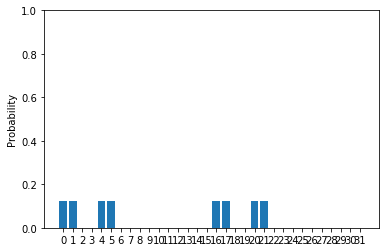

# : State
00000 : (0.25000000000000006+0j)
00001 : (0.25000000000000006+0j)
00010 : (0.25000000000000006+0j)
00011 : (0.35355339059327384+0j)
00100 : (0.25000000000000006+0j)
00101 : (0.25000000000000006+0j)
00110 : (0.25000000000000006+0j)
01011 : (0.17677669529663692+0.17677669529663692j)
01111 : (0.17677669529663692-0.17677669529663692j)
10000 : (0.25000000000000006+0j)
10001 : (0.25000000000000006+0j)
10010 : (0.25000000000000006+0j)
10100 : (0.25000000000000006+0j)
10101 : (0.25000000000000006+0j)
10110 : (0.25000000000000006+0j)


In [8]:
execute('MatrixModel', QC, option='barplot')
execute('MatrixModel', QC, [[1, 0], [1/np.sqrt(2), 1/np.sqrt(2)], [1, 0], [1, 0], [1, 0]], option='nonzero')
execute('MatrixModel', QC, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], option='silent')

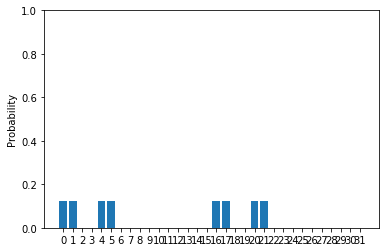

# : State
00000 : (0.25000000000000006+0j)
00001 : (0.25000000000000006+0j)
00010 : (0.25000000000000006+0j)
00011 : (0.35355339059327384+0j)
00100 : (0.25000000000000006+0j)
00101 : (0.25000000000000006+0j)
00110 : (0.25000000000000006+0j)
01011 : (0.17677669529663692+0.17677669529663692j)
01111 : (0.17677669529663692-0.17677669529663692j)
10000 : (0.25000000000000006+0j)
10001 : (0.25000000000000006+0j)
10010 : (0.25000000000000006+0j)
10100 : (0.25000000000000006+0j)
10101 : (0.25000000000000006+0j)
10110 : (0.25000000000000006+0j)


In [9]:
execute('Cimulator', QC, option='barplot')
execute('Cimulator', QC, [[1, 0], [1/np.sqrt(2), 1/np.sqrt(2)], [1, 0], [1, 0], [1, 0]], option='nonzero')
execute('Cimulator', QC, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], option='silent')